openCV로 이미지 데이터를 변환해서 data augmentation 가능하다...!

In [0]:
# 구글 드라이브와 연동하는 방법
# Google File Drive Stream 접근을 허용해야 한다.
from google.colab import auth
auth.authenticate_user()

# 구글 드라이브 mount
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/Colab Notebooks/visual-intelligence-course/notes/day004

/content/gdrive/My Drive/Colab Notebooks/visual-intelligence-course/notes/day004


In [0]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

type(img1):  <class 'numpy.ndarray'>
img1.shape:  (225, 225, 3)
img1 is a truecolor image


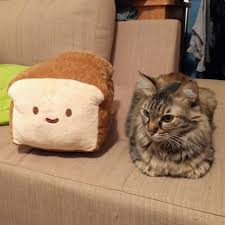

In [0]:
# img1 = cv.imread('cat.bmp', cv.IMREAD_GRAYSCALE)
img1 = cv.imread('cat.bmp', cv.IMREAD_COLOR)
# .bmp파일은 한 픽셀에 BGR(24bits)를 가진다.

if img1 is None:
  print('Image load failed')

print('type(img1): ', type(img1))
# c++ openCV(Mat)와 달리 numpy로 저장

print('img1.shape: ', img1.shape)

# grayscale인지 color인지 판단하는 방법
if len(img1.shape) == 2:
  print('img1 is a grayscale image')
elif len(img1.shape) == 3:
  print('img1 is a truecolor image')
  
cv2_imshow(img1)

In [0]:
img1 = np.empty((480, 640), np.uint8)
img2 = np.zeros((480, 640, 3), np.uint8)
img3 = np.ones((480, 640), np.uint32)
img4 = np.full((480, 640), 0, np.float32)

mat1 = np.array([[11, 12, 13, 14],
                 [21, 22, 23, 24],
                 [31, 32, 33, 34]]).astype(np.uint8)

mat1[0, 1] = 100   # element at x=1, y=0
mat1[2, :] = 200

print(mat1)

[[ 11 100  13  14]
 [ 21  22  23  24]
 [200 200 200 200]]


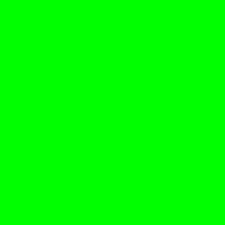

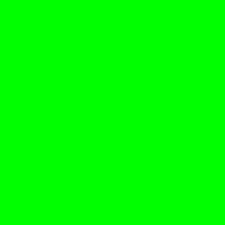

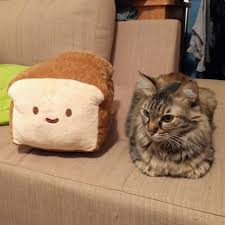

In [0]:
img1 = cv.imread('cat.bmp')
img2 = img1  # view : 같은 객체를 가리키고 있음
img3 = img1.copy()  # copy : 새로운 객체를 생성함

img1[:, :] = (0, 255, 0)  # green

cv2_imshow(img1)
print("")
cv2_imshow(img2)
print("")
cv2_imshow(img3)

(512, 512) (200, 200)


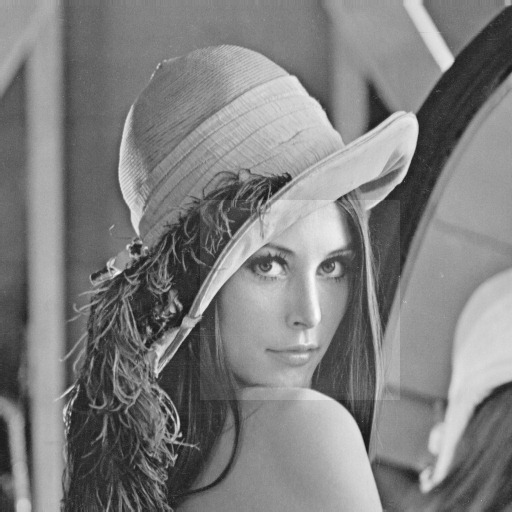

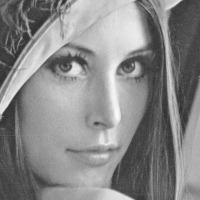

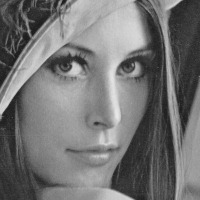

In [0]:
img1 = cv.imread('lena.bmp', cv.IMREAD_GRAYSCALE)
img2 = img1[200:400, 200:400]
print(img1.shape, img2.shape)
img3 = img1[200:400, 200:400].copy()

img2 += 20  # 밝기가 20 증가 == 밝아짐

cv2_imshow(img1)
print("")
cv2_imshow(img2)
print("")
cv2_imshow(img3)

# Data Augmentation techniques   
 Data Augmentation == 레나 사진을 잘르고 돌려도 레나는 레나다..!  
-> 데이터 수가 적을 때, 데이터수를 늘려서 모델 성능 증가  
5쪽 : skin lesion사진 1장으로 12장을 만듦